### 1、数据加载与可视化

#### 数据加载

In [4]:
from sklearn.datasets import load_iris
import pandas as pd

# 加载鸢尾花数据集
data = load_iris()

# 转换为 DataFrame 方便查看
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['species'] = df['target'].apply(lambda x: data.target_names[x])

# 查看前几行数据
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


#### 数据可视化

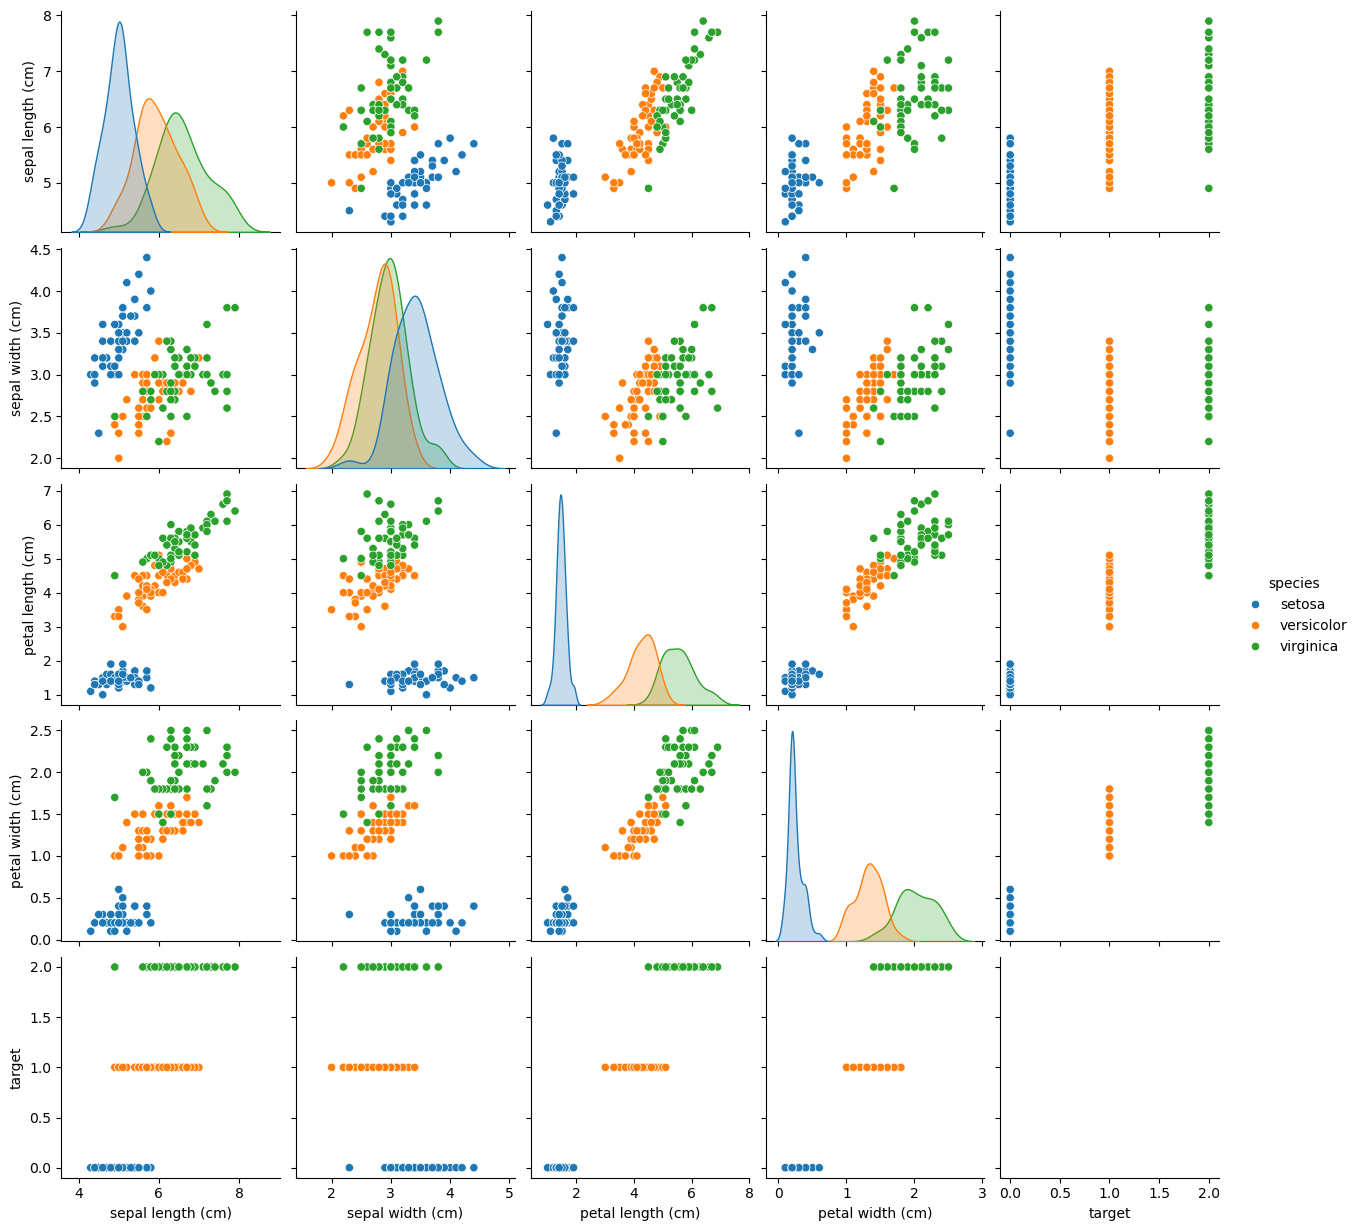

In [5]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 加载鸢尾花数据集
data = load_iris()

# 转换为 DataFrame 方便查看
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['species'] = df['target'].apply(lambda x: data.target_names[x])

# 绘制特征之间的关系
sns.pairplot(df, hue="species")
plt.show()

#### 热力图可视化特征之间的相关性

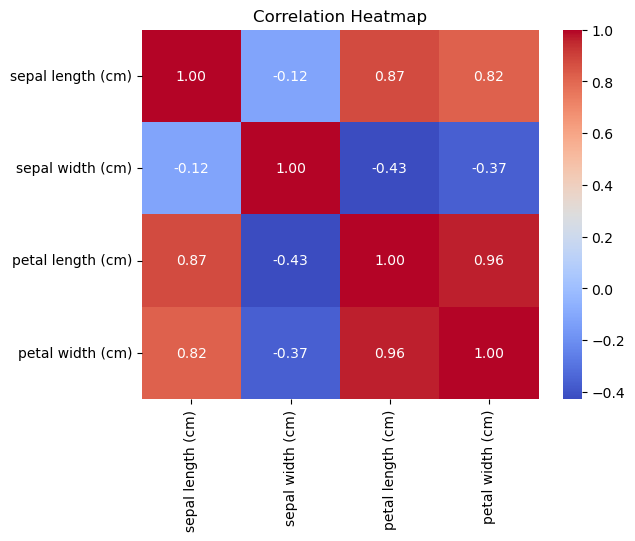

In [6]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 加载鸢尾花数据集
data = load_iris()

# 转换为 DataFrame 方便查看
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['species'] = df['target'].apply(lambda x: data.target_names[x])

# 绘制特征之间的关系
correlation_matrix = df.drop(columns=['target', 'species']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### 2、特征选择与数据预处理

#### 数据预处理

In [7]:
from sklearn.preprocessing import StandardScaler

# 提取特征和标签
X = df.drop(columns=['target', 'species'])
y = df['target']

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 特征选择

In [8]:
from sklearn.feature_selection import SelectKBest, f_classif

# 使用卡方检验选择 2 个最相关的特征
selector = SelectKBest(f_classif, k=2)
X_new = selector.fit_transform(X_scaled, y)

# 打印选择的特征
selected_features = selector.get_support(indices=True)
print("Selected features:", X.columns[selected_features])

Selected features: Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


### 建立一个分类模型：使用决策树或 SVM 进行分类

#### 使用决策树分类器

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 初始化决策树分类器
model_dt = DecisionTreeClassifier(random_state=42)

# 训练模型
model_dt.fit(X_train, y_train)

# 预测
y_pred_dt = model_dt.predict(X_test)

# 评估模型
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

Decision Tree Accuracy: 1.0000


#### 使用支持向量机（SVM）进行分类

In [10]:
from sklearn.svm import SVC

# 初始化 SVM 分类器
model_svm = SVC(kernel='linear', random_state=42)

# 训练模型
model_svm.fit(X_train, y_train)

# 预测
y_pred_svm = model_svm.predict(X_test)

# 评估模型
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

SVM Accuracy: 0.9667


### 4、评估模型并优化

#### 模型评估

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix (Decision Tree):")
print(cm)

# 精度、召回率、F1 分数
report = classification_report(y_test, y_pred_dt)
print("Classification Report (Decision Tree):")
print(report)

Confusion Matrix (Decision Tree):
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### 网格搜索调优

In [12]:
from sklearn.model_selection import GridSearchCV

# 定义决策树的参数网格
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 初始化 GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5)

# 训练网格搜索
grid_search.fit(X_train, y_train)

# 获取最佳参数和最佳模型
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# 预测和评估
y_pred_optimized = best_model.predict(X_test)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Decision Tree Accuracy: {accuracy_optimized:.4f}")

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Optimized Decision Tree Accuracy: 1.0000


#### 交叉验证

In [13]:
from sklearn.model_selection import cross_val_score

# 进行 5 折交叉验证
cross_val_scores = cross_val_score(best_model, X_scaled, y, cv=5)
print(f"Cross-validation Scores: {cross_val_scores}")
print(f"Mean CV Accuracy: {cross_val_scores.mean():.4f}")

Cross-validation Scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean CV Accuracy: 0.9600
